

# Package



In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import shapiro, anderson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.sandbox.stats.runs import runstest_1samp

In [3]:
from sklearn.model_selection import cross_val_score, KFold

In [4]:
df = pd.read_excel("/content/Data TBC.xlsx")
df

,Kabupaten/Kota,Y,X1,X2,X3,X4,X5,X6,X7,X8,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,Bogor,12153,3750,26,101,6918,797,12537,751,474.7,...,435,396.53,1444.34,5556.31,2710.62,2589167,10.64,71.20,2897332,12.50
1,Sukabumi,4828,2142,9,58,3655,146,5594,177,186.3,...,386,351.54,292.64,2775.31,4145.70,1211763,7.77,67.64,1313905,12.25
2,Cianjur,4746,2481,5,47,3616,582,3039,219,246.8,...,360,457.22,453.24,2529.81,3840.16,1119786,8.41,65.94,1222589,12.01
3,Bandung,5839,4444,11,62,3186,343,8605,502,258.6,...,280,559.62,401.85,3687.25,1767.96,1682510,6.98,73.16,1808799,12.71
4,Garut,4855,3339,7,67,4287,482,8411,212,276.7,...,442,330.21,223.24,2648.95,3074.07,1229218,7.60,67.41,1330353,12.15
5,Tasikmalaya,2130,1940,1,40,2189,125,4032,86,194.1,...,351,130.02,130.02,1892.22,2551.19,901466,4.17,66.84,940713,12.59
6,Ciamis,1664,8539,5,37,2033,174,2174,106,94.0,...,265,151.74,147.20,1243.32,1414.71,639600,3.75,71.45,664523,14.28
7,Kuningan,1726,2540,11,37,2441,302,2877,165,140.3,...,376,262.64,262.00,1189.01,1110.56,478750,9.81,70.16,530825,12.24
8,Cirebon,3472,1826,10,60,4701,549,8438,340,266.1,...,424,235.00,200.00,2331.36,984.52,1020411,8.11,70.06,1110529,12.28
9,Majalengka,1744,1600,3,32,2627,386,2452,168,147.1,...,343,155.60,114.00,1328.01,1204.24,617320,4.16,68.56,644128,12.24


# Eksplorasi Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Kabupaten/Kota  27 non-null     object 
 1   Y               27 non-null     int64  
 2   X1              27 non-null     int64  
 3   X2              27 non-null     int64  
 4   X3              27 non-null     int64  
 5   X4              27 non-null     int64  
 6   X5              27 non-null     int64  
 7   X6              27 non-null     int64  
 8   X7              27 non-null     int64  
 9   X8              27 non-null     float64
 10  X9              27 non-null     int64  
 11  X10             27 non-null     int64  
 12  X11             27 non-null     int64  
 13  X12             27 non-null     float64
 14  X13             27 non-null     float64
 15  X14             27 non-null     float64
 16  X15             27 non-null     float64
 17  X16             27 non-null     int64

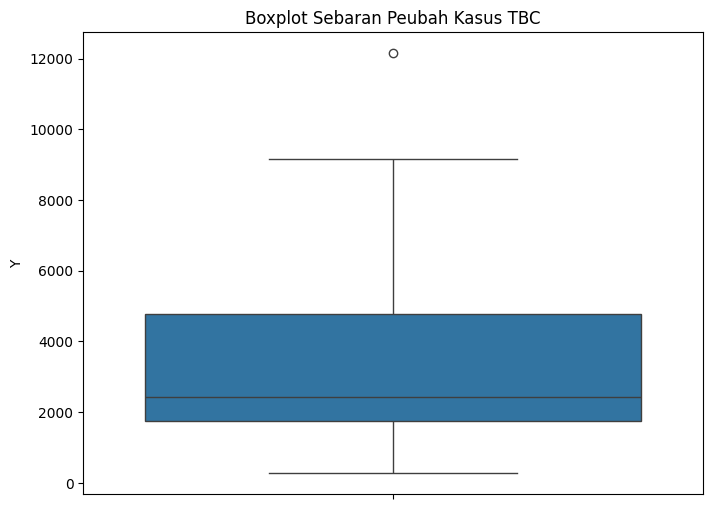

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Y '])
plt.title("Boxplot Sebaran Peubah Kasus TBC")
plt.ylabel("Y")
plt.show()

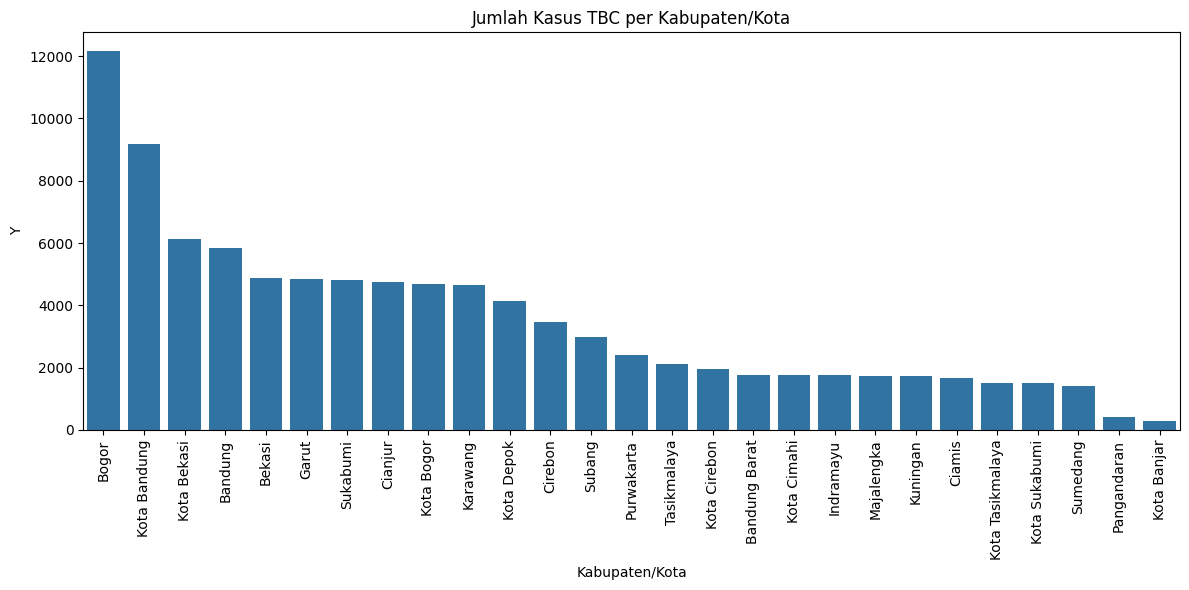

In [7]:
df_sorted = df.sort_values(by='Y ', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Kabupaten/Kota', y='Y ', data=df_sorted)
plt.title('Jumlah Kasus TBC per Kabupaten/Kota')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Y')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [8]:
df = df.drop(columns=['Kabupaten/Kota'])

In [9]:
Y_asli = df['Y '].copy()
X_asli = df.drop(columns=['Y ']).copy()

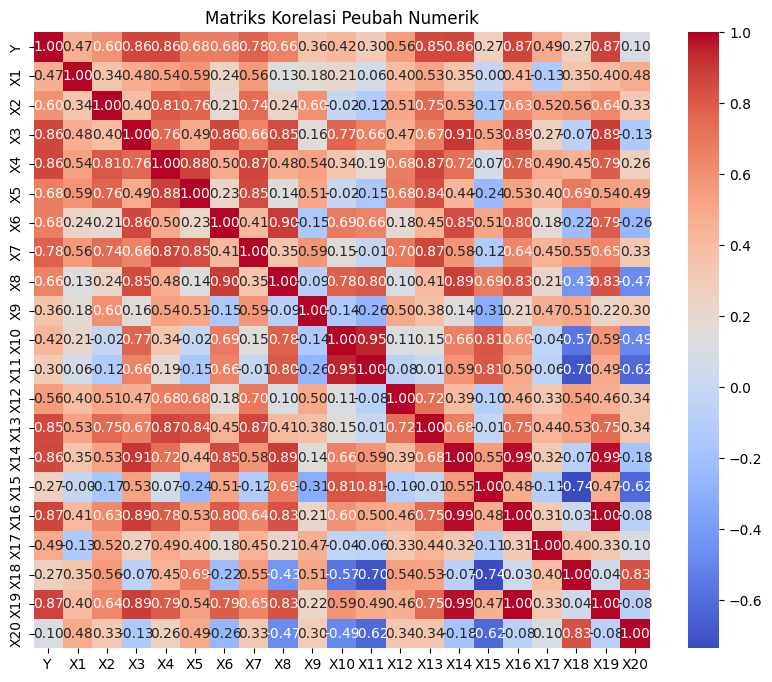

In [10]:
# Hitung korelasi
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriks Korelasi Peubah Numerik")
plt.show()

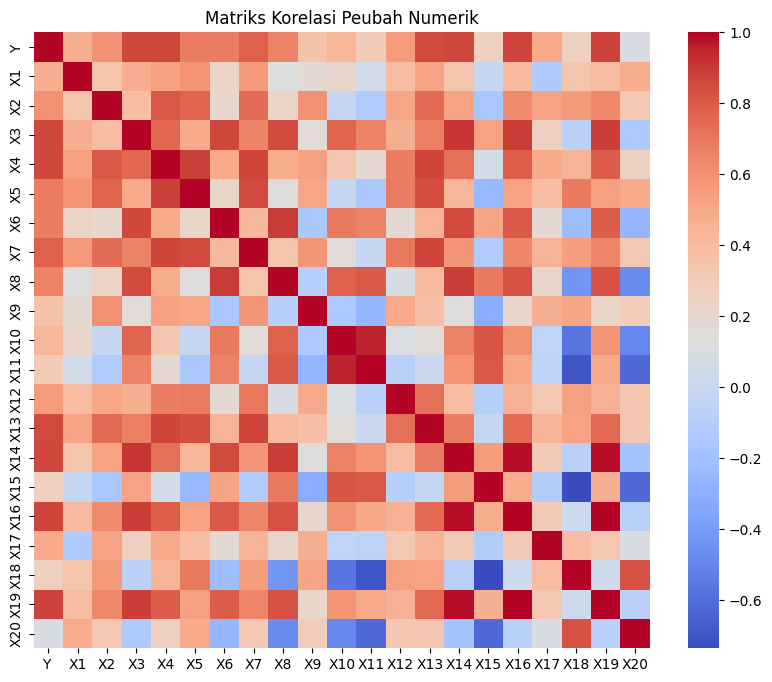

In [11]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriks Korelasi Peubah Numerik")
plt.show()

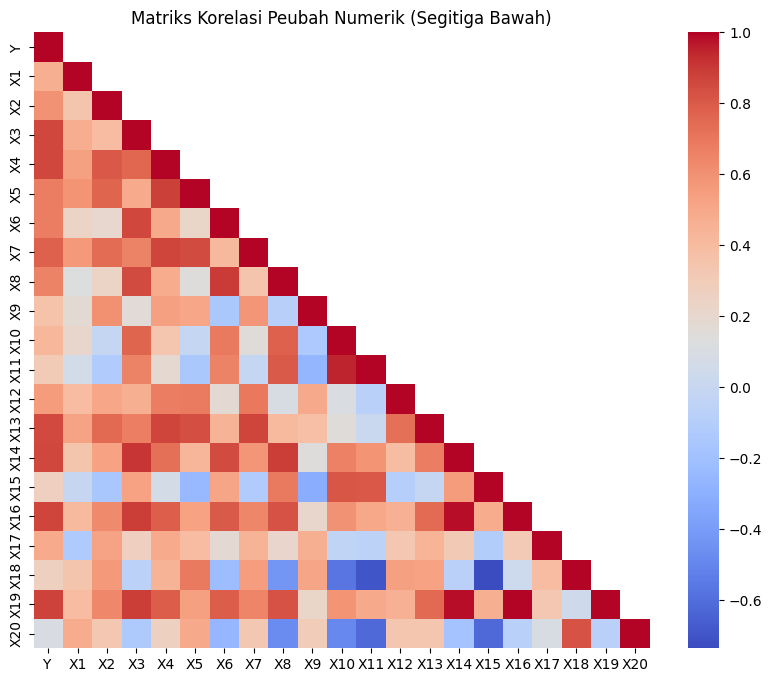

In [12]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool),k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', square=True, linewidths=0)
plt.title("Matriks Korelasi Peubah Numerik (Segitiga Bawah)")
plt.show()

# Standarisasi Peubah

In [13]:
# Standarisasi semua kolom di df (y dan x sekaligus)
X = df.drop(columns='Y ')
Y = df['Y ']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
scaler.scale_

array([2.26917081e+03, 1.15993945e+01, 2.09926501e+01, 1.91776663e+03,
       3.82954384e+02, 2.85974136e+03, 2.61962699e+02, 1.00499270e+02,
       2.00521564e+04, 1.29938257e+01, 1.42159313e+02, 3.39984188e+02,
       3.82532661e+02, 1.17904949e+03, 1.14711425e+03, 5.72472595e+05,
       2.28836402e+00, 4.63268326e+00, 6.35675100e+05, 7.69852925e-01])

# Regresi OLS

In [15]:
# Tambahkan konstanta
X_const = sm.add_constant(X_scaled)

# Fit model regresi
model = sm.OLS(Y, X_const).fit()

# Tampilkan ringkasan
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y    R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     19.26
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           0.000715
Time:                        11:18:39   Log-Likelihood:                -194.47
No. Observations:                  27   AIC:                             430.9
Df Residuals:                       6   BIC:                             458.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3503.7407    132.680     26.408      0.0

In [16]:
model.params

,0
const,3503.740741
x1,-439.936214
x2,-1394.631064
x3,4743.572200
x4,2378.018972
x5,-1046.730803
x6,-1124.078706
x7,-105.598927
x8,-3350.194073
x9,-113.020821


In [17]:
# Prediksi nilai Y menggunakan model
Y_pred = model.predict(X_const)

# Hitung MSE
mse = mean_squared_error(Y, Y_pred)

print("MSE:", mse)

MSE: 105623.39883478926


In [18]:
print("RMSE:", np.sqrt(mse))

RMSE: 324.9975366595711


In [19]:
# Tambahkan konstanta (intercept)
X_const = add_constant(X)

# Hitung VIF untuk setiap kolom
vif_df = pd.DataFrame()
vif_df['Variable'] = X_const.columns
vif_df['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_df)

   Variable           VIF
0     const  18924.215860
1        X1      5.674850
2        X2     18.232592
3        X3    176.566294
4        X4     41.671238
5        X5     22.351908
6        X6     26.037427
7        X7     26.118930
8        X8    123.361525
9        X9      8.682933
10      X10     84.148860
11      X11     41.087448
12      X12     10.995260
13      X13     36.016824
14      X14    297.818738
15      X15     23.907931
16      X16  25960.246643
17      X17     27.003306
18      X18    109.116807
19      X19  23183.085022
20      X20      7.509534


# Asumsi Sisaan

## Asumsi Normalitas Sisaan

In [20]:
stat, p = shapiro(model.resid)
print(f'Shapiro-Wilk Test: statistic={stat}, p-value={p}')

Shapiro-Wilk Test: statistic=0.9767229961737575, p-value=0.7820827281527724


In [21]:
ad_norm = anderson(model.resid, dist='norm')
print("\nAnderson-Darling Test:")
print("Statistic =", ad_norm.statistic)
for cv, sig in zip(ad_norm .critical_values, ad_norm .significance_level):
    print(f"Critical value for {sig}%: {cv}")


Anderson-Darling Test:
Statistic = 0.19367777692745136
Critical value for 15.0%: 0.517
Critical value for 10.0%: 0.589
Critical value for 5.0%: 0.707
Critical value for 2.5%: 0.824
Critical value for 1.0%: 0.98


## Asumsi Heteroskedastisitas Sisaan

In [22]:
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': np.float64(15.824505347619393), 'p-value': np.float64(0.7274502262307759)}


## Asumsi Autokorelasi Sisaan

In [23]:
dw = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw}')

Durbin-Watson statistic: 2.0964214476304854


In [24]:
bg_test = acorr_breusch_godfrey(model, nlags=1)  # nlags = 1 untuk autokorelasi lag-1
labels = ['LM stat', 'LM p-value']
print(dict(zip(labels, bg_test)))

{'LM stat': np.float64(1.858960883124137), 'LM p-value': np.float64(0.1727447771594026)}


In [25]:
# Konversi residu menjadi tanda (+1 / -1)
signs = np.sign(model.resid)

z_stat, p_value = runstest_1samp(signs)
print("Runs Test Z-statistic:", z_stat)
print("p-value:", p_value)

Runs Test Z-statistic: 0.4638994532252679
p-value: 0.6427197845862185


# SGD Optim Lasso

In [26]:
# Inisialisasi SGD dengan kendala L1
sgd = SGDRegressor(penalty='l1', random_state=42)

In [27]:
# Tuning hyperparameter
param_grid = {
    'alpha': np.arange(1, 301, 1),           # Regularisasi L1
     'eta0': [0.001, 0.01, 0.1],            # Learning rate awal
    'learning_rate': ['constant', 'invscaling', 'optimal'],
    'max_iter': [500, 1000, 2000],
}

    'eta0': [0.001, 0.01, 0.1],            # Learning rate awal
    'learning_rate': ['constant', 'invscaling'],

np.logspace(np.log10(10), np.log10(400), 200)

In [28]:
grid = GridSearchCV(sgd, param_grid, cv=(KFold(n_splits=10, shuffle=True, random_state=42)), scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(X_scaled, Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SGDRegressor(penalty='l1', random_state=42), n_jobs=-1,
             param_grid={'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  6...
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
       300]),
                         'eta0': [0.001, 0.01, 0.1],
                         'learning_rate': ['constant', 'invscaling', 'optimal'],
                         'max_iter': [500, 1000, 2000]},
             scoring='neg_root_mean_squared_error')

In [29]:
# Evaluasi model terbaik
best_model = grid.best_estimator_
y_pred = best_model.predict(X_scaled)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'alpha': np.int64(209), 'eta0': 0.1, 'learning_rate': 'invscaling', 'max_iter': 500}


In [30]:
# Ambil hasil grid search dalam bentuk DataFrame
results_df = pd.DataFrame(grid.cv_results_)

# Filter hanya baris dengan kombinasi hyperparameter tertentu jika ingin
# Tapi di sini kita ambil semua dan plot terhadap alpha

# Kelompokkan berdasarkan alpha, ambil RMSE rata-rata
grouped = results_df.groupby('param_alpha')['mean_test_score'].mean()

# Ubah jadi RMSE positif
alphas = grouped.index.astype(float)
rmse_scores = -grouped.values  # neg_root_mean_squared_error → balik ke positif

# Cari alpha terbaik
best_alpha = grid.best_params_['alpha']
best_rmse = -grid.best_score_

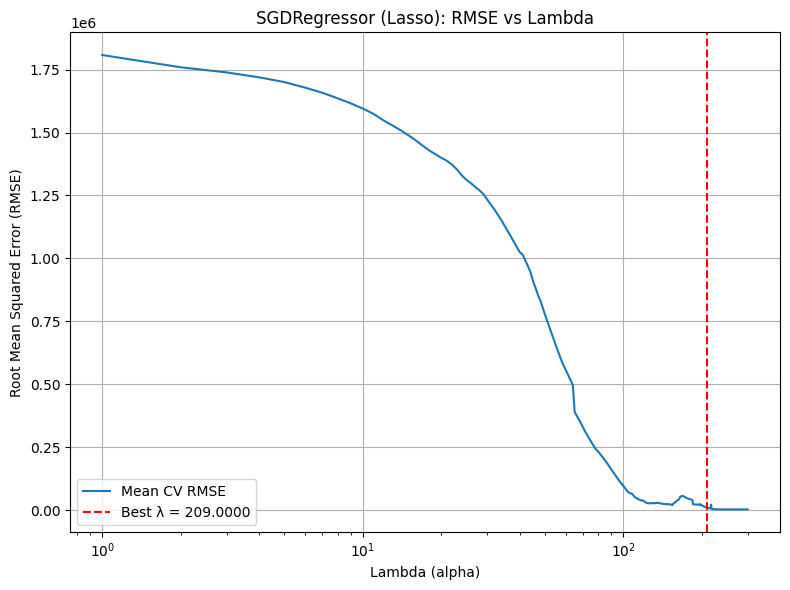

In [31]:
# Plot
plt.figure(figsize=(8, 6))
plt.plot(alphas, rmse_scores, label='Mean CV RMSE')
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best λ = {best_alpha:.4f}')
plt.xscale('log')
plt.xlabel('Lambda (alpha)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('SGDRegressor (Lasso): RMSE vs Lambda')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
coef = best_model.coef_
intersep = best_model.intercept_
print("Koefisien:", coef)
print("Intercept:", intersep)

Koefisien: [   0.            0.         1031.60310242   11.68521354    0.
   41.82115243    0.            0.           27.28690025    0.
    0.            0.         1051.35143877  258.24045177    0.
   64.19499233  285.18273861    0.          293.36889587    0.        ]
Intercept: [3556.17478921]


In [33]:
# MSE
mse = mean_squared_error(Y, y_pred)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(Y, y_pred)

# R^2 dan Adjusted R^2
r2 = r2_score(Y, y_pred)
n = X.shape[0]  # jumlah observasi
p = np.sum(coef != 0)  # jumlah prediktor terpilih
adj_r2 = 1 - (1 - r2)*(n - 1)/(n - p - 1)

In [34]:
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)
print("Adjusted R^2:", adj_r2)

MSE: 671550.2513808082
RMSE: 819.4816967942653
MAE: 648.5926208512693
R^2: 0.9025083517981988
Adjusted R^2: 0.8508951262795981


# Koefisien Asli

In [35]:
scaler.scale_

array([2.26917081e+03, 1.15993945e+01, 2.09926501e+01, 1.91776663e+03,
       3.82954384e+02, 2.85974136e+03, 2.61962699e+02, 1.00499270e+02,
       2.00521564e+04, 1.29938257e+01, 1.42159313e+02, 3.39984188e+02,
       3.82532661e+02, 1.17904949e+03, 1.14711425e+03, 5.72472595e+05,
       2.28836402e+00, 4.63268326e+00, 6.35675100e+05, 7.69852925e-01])

In [36]:
# Koefisien standar dari model
coef_standard = best_model.coef_

# Intersep standar dari model
intercept_standard = best_model.intercept_

# Skala fitur: simpan mean dan std dari scaler
X_means = scaler.mean_
X_stds = scaler.scale_

# Mengembalikan koefisien ke skala asli
coef_original = coef_standard / X_stds

# Mengembalikan intersep ke skala asli
intercept_original = intercept_standard - np.sum(X_means * coef_original)

print("Koefisien (skala asli):", coef_original)
print("Intersep (skala asli):", intercept_original)

Koefisien (skala asli): [0.00000000e+00 0.00000000e+00 4.91411564e+01 6.09313635e-03
 0.00000000e+00 1.46241031e-02 0.00000000e+00 0.00000000e+00
 1.36079630e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.74839653e+00 2.19024268e-01 0.00000000e+00 1.12136359e-04
 1.24622978e+02 0.00000000e+00 4.61507610e-04 0.00000000e+00]
Intersep (skala asli): [-1577.36809895]


In [37]:
# Tampilkan hasil
for name, coef in zip(X_asli.columns, coef_original):
    print(f"{name}: {coef:.5f}")
print("Intercept:", intercept_original)

X1: 0.00000
X2: 0.00000
X3: 49.14116
X4: 0.00609
X5: 0.00000
X6: 0.01462
X7: 0.00000
X8: 0.00000
X9: 0.00136
X10: 0.00000
X11: 0.00000
X12: 0.00000
X13: 2.74840
X14: 0.21902
X15: 0.00000
X16: 0.00011
X17: 124.62298
X18: 0.00000
X19: 0.00046
X20: 0.00000
Intercept: [-1577.36809895]


In [38]:
# Prediksi manual dengan koefisien asli
y_pred_manual = intercept_original + np.dot(X_asli, coef_original)

# MSE
mse = mean_squared_error(Y, y_pred_manual)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(Y, y_pred_manual)

# Evaluasi R-squared
r2 = r2_score(Y, y_pred_manual)
n = X.shape[0]  # jumlah observasi
p = np.sum(coef_original != 0)  # jumlah prediktor terpilih
adj_r2 = 1 - (1 - r2)*(n - 1)/(n - p - 1)

In [39]:
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r2)
print("Adjusted R^2:", adj_r2)

MSE: 671550.2513808082
RMSE: 819.4816967942653
MAE: 648.5926208512693
R^2: 0.9025083517981988
Adjusted R^2: 0.8508951262795981


In [40]:
y_pred_manual

array([11792.49750051,  4524.05838609,  4354.89003205,  5452.35301259,
        4778.65355727,  2306.09862934,  1833.74216701,  2820.51163371,
        4241.95947511,  1560.88549   ,  2157.71148566,  4203.990724  ,
        3372.87783641,  1475.95889703,  4496.80233219,  5877.87496837,
        2644.27691972,  -215.4026488 ,  3105.76718003,   853.3771256 ,
        8617.73212312,  1237.82269358,  6786.44615671,  5295.37003978,
        1250.46591314,  1315.92031591,  -125.92263745])

In [41]:
Y.values

array([12153,  4828,  4746,  5839,  4855,  2130,  1664,  1726,  3472,
        1744,  1426,  1754,  2991,  2417,  4660,  4867,  1771,   421,
        4677,  1496,  9165,  1966,  6134,  4142,  1763,  1520,   274])